# Integrated Simulations

In [1]:
import os; from os import listdir; from os.path import isfile, join
import re  
#from skimage import io 
from skimage.io import imread
# To manipulate arrays
import numpy as np 
import random
from tqdm.notebook import tqdm
from timeit import default_timer as timer
import scipy
import pandas as pd
import shutil
import pathlib
import sys
import rsnapsim as rss
from skimage.exposure import rescale_intensity
# Plotting
import matplotlib as mpl ; import matplotlib.pyplot as plt 
# To create interactive elements
import ipywidgets as widgets ; from ipywidgets import interact, interactive, fixed, interact_manual, Button, HBox, VBox, Layout, GridspecLayout ; from IPython.display import Image
# Importing rsnaped
current_dir = pathlib.Path().absolute()
rsnaped_dir = current_dir.parents[1].joinpath('rsnaped')
sys.path.append(str(rsnaped_dir))
import rsnaped as rsp

In [2]:

# Deffining directories
video_dir = current_dir.parents[1].joinpath('DataBases/CAP_IRES')
#video_dir = current_dir.parents[1].joinpath('DataBases/12xSun-KDM5B___1xFLAG-12xSun-AlexX')
#video_dir = current_dir.parents[1].joinpath('DataBases','Hela')


In [3]:
#Function to detect all tif files in a folder
def folder_reader(folder):
    '''
    This function imports all tif files in a give folder.
    Input:
    folder: str, with the file name.
    
    Returns:
    list_files_names :  List of str with all file names
    path_files : List of str with all file paths
    '''
    # Reads the folder with the results and import the simulations as lists
    list_files_names = sorted([f for f in listdir(folder) if isfile(join(folder, f)) and ('.tif') in f], key=str.lower)  # reading all tif files in the folder
    try:
        list_files_names.sort(key=lambda f: int(re.sub('\D', '', f)))  # sorting the index in numerical order
    except:
        pass
    path_files = [ str(folder.joinpath(f).resolve()) for f in list_files_names ] # creating the complete path for each file
    # Reading the microscopy data
    max_frames_to_read = 100
    list_videos = [imread(f)[0:max_frames_to_read,:,:,:] for f in  path_files] # List with all the videos. 
    num_videos = len(path_files) # the number of videos in the folder is the length of list_videos
    return path_files, list_files_names,list_videos, num_videos

In [4]:
# Load videos 
path_files,list_files_names,list_videos, num_videos = folder_reader(video_dir)
print(path_files)

['/home/luisub/Desktop/rsnaped/DataBases/CAP_IRES/BG_MAX_Cell04.tif']


In [5]:
def plot_original_images(image,slice=0):
    '''
    This function plots all the channels for the original image.
    '''
    number_channels = image.shape[3]
    fig, axes = plt.subplots(nrows=1, ncols=number_channels, figsize=(15, 5))
    for i in range (0,number_channels ):
        img_2d = image[slice,:,:,i]
        img_2d_rescaled = rsp.RemoveExtrema(img_2d, min_percentile = 0.1, max_percentile= 99.9, selected_channels=[0,1]).remove_outliers()
        axes[i].imshow(img_2d_rescaled, cmap='viridis') 
        axes[i].set_title('Channel_'+str(i))
    plt.show()

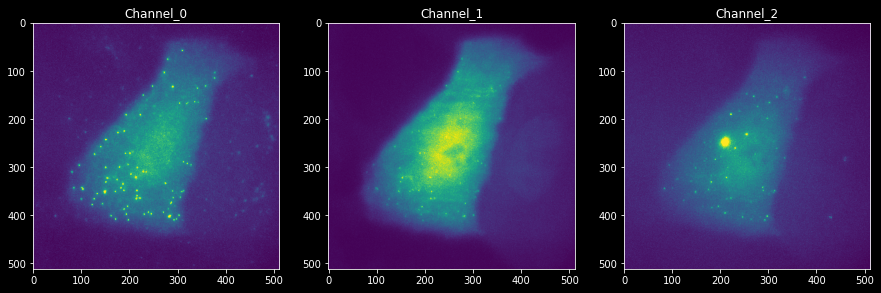

In [6]:
for i,vid in enumerate(list_videos):
    plot_original_images(vid)

In [7]:
print(list_videos[0].shape)

(25, 512, 512, 3)


# Tracking

In [8]:
intensity_calculation_method = 'disk_donut'  # options are : 'total_intensity' and 'disk_donut' 'gaussian_fit'
mask_selection_method = 'max_area'           # options are : 'max_spots' and 'max_area' 
use_optimization_for_tracking = 1            # 0 not using, 1 is using optimization
min_percentage_time_tracking = 0.3            # (normalized) minimum time to consider a trajectory.
particle_detection_size = 7                  # spot size for the simulation and tracking.
selected_channel = 0                         # Selected channel for tracking
average_cell_diameter = 200                    # cell diameter
intensity_threshold_tracking = None          # intensity threshold. If None, the code uses automatic detection # 

mask time: 13  sec


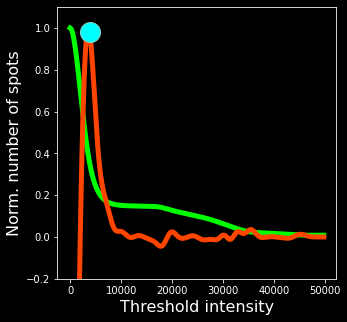

The number of detected trajectories is:  186
The selected intensity threshold is:  3838.0 

tracking time: 21  sec


Exception in thread ExecutorManagerThread:
Traceback (most recent call last):
  File "/home/luisub/anaconda3/envs/rsnaped_env/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/home/luisub/anaconda3/envs/rsnaped_env/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 569, in run
    self.process_result_item(result_item)
  File "/home/luisub/anaconda3/envs/rsnaped_env/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 707, in process_result_item
    executor._adjust_process_count()
  File "/home/luisub/anaconda3/envs/rsnaped_env/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py", line 1100, in _adjust_process_count
    p.start()
  File "/home/luisub/anaconda3/envs/rsnaped_env/lib/python3.8/multiprocessing/process.py", line 121, in start
    self._popen = self._Popen(self)
  File "/home/luisub/anaconda3/envs/rsnaped_env/lib/python3.8/site-packages/joblib/externals/loky/backend/process.p

In [9]:
list_DataFrame_particles_intensities= []
for i, temp_video in enumerate(list_videos):
    DataFrame_particles_intensities, _, _, _,_, _, _ = rsp.PipelineTracking(temp_video,particle_size=particle_detection_size,file_name=list_files_names[i],selected_channel=selected_channel,intensity_calculation_method =intensity_calculation_method, mask_selection_method = mask_selection_method,show_plot=1,use_optimization_for_tracking=use_optimization_for_tracking,real_positions_dataframe = None, average_cell_diameter=average_cell_diameter, print_process_times=1,min_percentage_time_tracking=min_percentage_time_tracking,intensity_threshold_tracking=intensity_threshold_tracking).run()    
    list_DataFrame_particles_intensities.append(DataFrame_particles_intensities)

In [ ]:
df =list_DataFrame_particles_intensities[0]


In [ ]:
df